In [ ]:
# import functions and libraries
import numpy as np, matplotlib.pyplot as plt
from matplotlib.pyplot import *
from scipy import signal
from numpy import *
!sudo apt-get install libportaudio2
!pip install sounddevice
import sounddevice as sd

from IPython.display import Audio

from google.colab import drive
drive.mount('/content/drive',force_remount=True)

!pip install ffmpeg-python
# import mic_to_np_arr as mic
!wget -O mic_to_np_arr_TEMP.py https://raw.githubusercontent.com/AbrahamSteenhoek/RaspPi_DSP/main/mic_to_np_arr.py
import mic_to_np_arr_TEMP as mic

%matplotlib inline

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  libportaudio2
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 64.6 kB of archives.
After this operation, 215 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudio2 amd64 19.6.0-1 [64.6 kB]
Fetched 64.6 kB in 1s (88.3 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package libportaudio2:amd64.
(Reading database ... 155222 file

In [29]:
def plot_chirp( s_chirp, t, fs ):
  # set the aspect ratio such that the image is wide
  width, height = figaspect(0.2)
  fig = figure(figsize=(width,height))

  # your code here:
  plt.plot(t[t<0.5], s_chirp[t<0.5])
  plt.xlabel("Time [s]")
  plt.ylabel("Amplitude")
  plt.title("Chirp signal")

  w, Sf_chirp = signal.freqz(s_chirp, worN=512)

  f = w/pi*fs/2

  # plot
  width, height = plt.figaspect(0.2)
  fig = plt.figure(figsize=(width,height))
  plt.plot(f, abs(Sf_chirp))
  plt.xlabel("Frequency [Hz]")
  plt.ylabel("Magnitude")
  plt.title("Frequency response of chirp signal")

In [36]:
fs = 48000.0
f0 = 20.0
f1 = 18000.0
T = 30

# your code here:

# generate time index
t = r_[0:T:(1/fs)]

# generate chirp signal
k = (f1-f0)/T
phi_of_t = 2*pi*(f0 + k/2*t)*t
s_chirp = 0.5*sin(phi_of_t)

plot_chirp( s_chirp, t, fs )

# play the sound through the speaker
Audio(data=s_chirp, rate=48000)

Output hidden; open in https://colab.research.google.com to view.

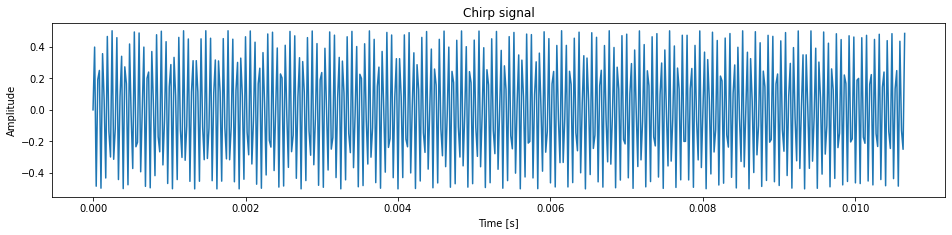

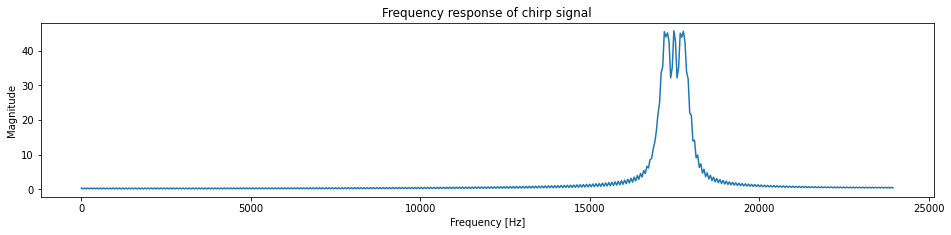

In [37]:
fs = 48000.0
N = 512
f0 = 17000.0
f1 = 18000.0
T = N/fs

# your code here:

# generate time index
t = r_[0:N]/fs

# generate chirp signal
k = (f1-f0)/T
phi_of_t = 2*pi*(f0 + k/2*t)*t
s_chirp = 0.5*sin(phi_of_t)

plot_chirp( s_chirp, t, fs )

# play the sound through the speaker
Audio(data=s_chirp, rate=48000)

Text(0.5, 1.0, 'Autocorrelation of chirp')

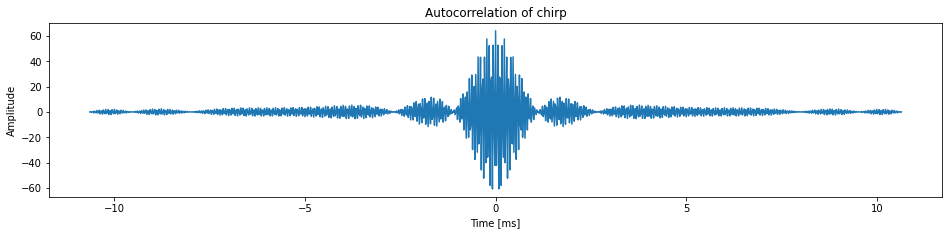

In [41]:
s_chirp_corr = signal.convolve( s_chirp, conj(s_chirp[::-1]))

t = (r_[-len(s_chirp_corr)/2.0:len(s_chirp_corr)/2.0] + 0.5) / fs * 1e3 # plot in ms

# plot
width, height = figaspect(0.2)
fig = figure(figsize=(width,height))
plt.plot(t, s_chirp_corr)
plt.xlabel("Time [ms]")
plt.ylabel("Amplitude")
plt.title("Autocorrelation of chirp")

#Matched Filter

Text(0.5, 1.0, 'Envelope of chirp autocorrelation (analytic signal), max = 127.92106651375734')

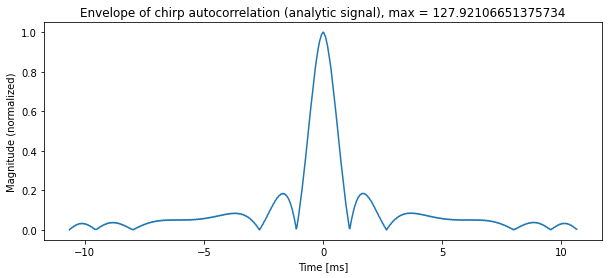

In [43]:
s_chirp_a = exp(1j*phi_of_t)
s_chirp_acorr = signal.convolve( s_chirp, conj( s_chirp_a[::-1] ) )
max_s_chirp_acorr = max(abs(s_chirp_acorr)) # normalize

tt = (r_[-len(s_chirp_acorr)/2:len(s_chirp_acorr)/2] + 0.5 ) / fs * 1e3

width, height = figaspect( 0.4 )
fig = figure(figsize=(width,height))
plt.plot(tt,abs(s_chirp_acorr)/max_s_chirp_acorr)
plt.xlabel('Time [ms]')
plt.ylabel('Magnitude (normalized)')
plt.title(f'Envelope of chirp autocorrelation (analytic signal), max = {max_s_chirp_acorr}')

Show the Autocorrelation envelope for 3 signals
- constant tone: 16 KHz
- small bandwidth chirp: 16.5 - 17.5 KHz
- wide bandwidth chirp: 15 - 19 KHz

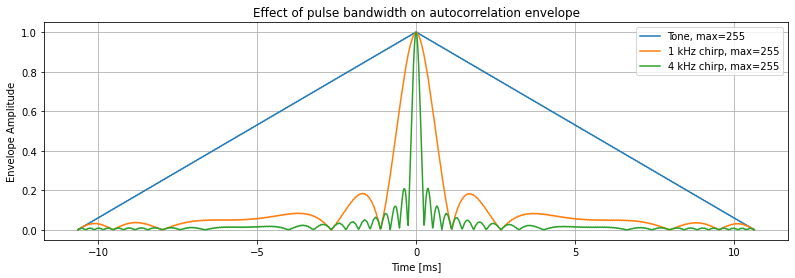

In [63]:
# your brilliant code here:
fs = 48e3
N = 512
T = N/fs
t = r_[0.0:N]/fs

# generate pure tone
f0 = 17e3
tone = sin(2*pi*f0*t)
tone_a = exp(1j*2*pi*f0*t)
cross_corr_tone = signal.convolve(tone, conj(tone_a[::-1]))
tt = (r_[-len(cross_corr_tone)/2.0:len(cross_corr_tone)/2.0] + 0.5) / fs * 1e3

# generate lower bandwidth chirp signal
f0 = 16.5e3
f1 = 17.5e3
k = (f1-f0)/T
phi_of_t = 2*pi*(f0 + k/2*t)*t
chirp_1khz = sin(phi_of_t)
chirp_1khz_a = exp(1j*phi_of_t)
cross_corr_1khz = signal.convolve(chirp_1khz, conj(chirp_1khz_a[::-1]))

# generate higher bandwidth chirp signal
f0 = 15e3
f1 = 19e3
k = (f1-f0)/T
phi_of_t = 2*pi*(f0 + k/2*t)*t
chirp_4khz = sin(phi_of_t)
chirp_4khz_a = exp(1j*phi_of_t)
cross_corr_4khz = signal.convolve(chirp_4khz, conj(chirp_4khz_a[::-1]))

# plot
width, height = figaspect(0.3)
fig = figure(figsize=(width,height))
plt.plot(tt, abs(cross_corr_tone)/max(abs(cross_corr_tone)))
plt.plot(tt, abs(cross_corr_1khz)/max(abs(cross_corr_1khz)))
plt.plot(tt, abs(cross_corr_4khz)/max(abs(cross_corr_4khz)))
plt.xlabel("Time [ms]")
plt.ylabel("Envelope Amplitude")
plt.title("Effect of pulse bandwidth on autocorrelation envelope")
plt.legend(("Tone, max=%i" %max(abs(cross_corr_tone)), "1 kHz chirp, max=%i" %max(abs(cross_corr_1khz)), "4 kHz chirp, max=%i" %max(abs(cross_corr_4khz))))
plt.grid(True)

Notice here, that for the tone, the FWHM is the same as the duration of the signa, 10.63ms. For the 1KHz BW chirp, the FWHM is ~1.23ms, and for the 4 KHz BH chirp, the FWHM is ~.3ms.

The BW's of the chirps are inversely proportional to the main lobe widths.

# Removing sidelobes
Use a hanning filter to remove the sidelobes. Hanning filter can be applied by multiplying the signal by the hanning window function

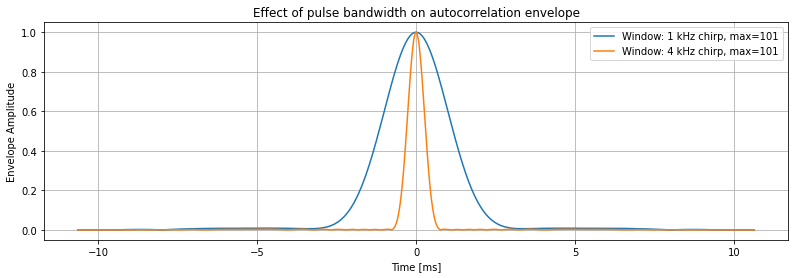

In [69]:
fs = 48000
N = 512
T = N/fs
t = r_[0:N]/fs # 512 points, from 0 - T

window = signal.hamming(N)

# generate lower bandwidth chirp signal
f0 = 16.5e3
f1 = 17.5e3
k = (f1-f0)/T
phi_of_t = 2*pi*(f0 + k/2*t)*t
chirp_1khz = sin(phi_of_t) * window
chirp_1khz_a = exp(1j*phi_of_t) * window
cross_corr_1khz = signal.convolve(chirp_1khz, conj(chirp_1khz_a[::-1]))

# generate higher bandwidth chirp signal
f0 = 15e3
f1 = 19e3
k = (f1-f0)/T
phi_of_t = 2*pi*(f0 + k/2*t)*t
chirp_4khz = sin(phi_of_t) * window
chirp_4khz_a = exp(1j*phi_of_t) * window
cross_corr_4khz = signal.convolve(chirp_4khz, conj(chirp_4khz_a[::-1]))

# plot
width, height = figaspect(0.3)
fig = figure(figsize=(width,height))
plt.plot(tt, abs(cross_corr_1khz)/max(abs(cross_corr_1khz)))
plt.plot(tt, abs(cross_corr_4khz)/max(abs(cross_corr_4khz)))
plt.xlabel("Time [ms]")
plt.ylabel("Envelope Amplitude")
plt.title("Effect of pulse bandwidth on autocorrelation envelope")
plt.legend(("Window: 1 kHz chirp, max=%i" %max(abs(cross_corr_1khz)), "Window: 4 kHz chirp, max=%i" %max(abs(cross_corr_4khz))))
plt.grid(True)